Bayan Nezamabad 20251971
Jacob Beck 21304149

Code executes to the end without errors

### References:
[The dataset](https://www.kaggle.com/datasets/shahidulugvcse/national-flowers) <br>
[Understanding GoogLeNet Model - CNN Architecture](https://www.geeksforgeeks.org/understanding-googlenet-model-cnn-architecture/) <br>
[Going Deeper with Convolutions](https://arxiv.org/pdf/1409.4842) <br>
[TensorFlow Tutorials](https://www.tensorflow.org/tutorials) <br>
[Matplotlib Docs](https://matplotlib.org/stable/)

In [11]:
# Imports
import kagglehub
import os
from keras import utils
import matplotlib.pyplot as plt

In [12]:
# Downloading dataset from Kaggle
path = kagglehub.dataset_download("shahidulugvcse/national-flowers")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\bayan\.cache\kagglehub\datasets\shahidulugvcse\national-flowers\versions\1


## The data set
Our dataset consists of images of 9 different types of national flowers which we will be classifying.
The total dataset consists of 4481 files, split roughly 80% training and 20% testing. <br>
Upon loading the dataset, some preprocessing is performed to make all images 224x224 since that is the requisite input size for GoogLeNet.

In [13]:
# Loading the data set
train_dir = path + '\\flowerdataset\\train'
test_dir = path + '\\flowerdataset\\test'

# GoogLeNet configurations
input_shape = (224, 224)
batch_size = 128

verbose = True
NB_CLASSES = 9
class_names = os.listdir(train_dir)

# Loading our training dataset
train_ds = utils.image_dataset_from_directory(
    directory=train_dir,
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=input_shape, # Images are resized to the correct dimensions
    shuffle=False,
    verbose=verbose)

# Loading our testing dataset
test_ds = utils.image_dataset_from_directory(
    directory=test_dir,
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=input_shape, # Images are resized to the correct dimensions
    shuffle=False,
    verbose=verbose)

Found 3600 files belonging to 9 classes.
Found 881 files belonging to 9 classes.


### Data preprocessing
For data preprocessing the first step is normalisation. We will use min-max normalisation to make all pixel values from the range 0 - 255 to 0 - 1.

In [14]:
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

### Data visualisation

Here we will visualise some of the data.<br>
First we will display a sample image of each class from the training dataset.
The images contain varying backgrounds and were originally of varying dimensions but we have scaled them all down to 224x224 for use with our models.<br><br>
Next we will display the class distribution for the training dataset and the testing dataset. As can be seen, the training dataset is entirely evenly distributed, and the testing dataset is also evenly distributed for the most part.<br>The only minor difference is that there are 92 test images for the Daisy class and 89 for the Orchid class. Every other class has 100 test images each.



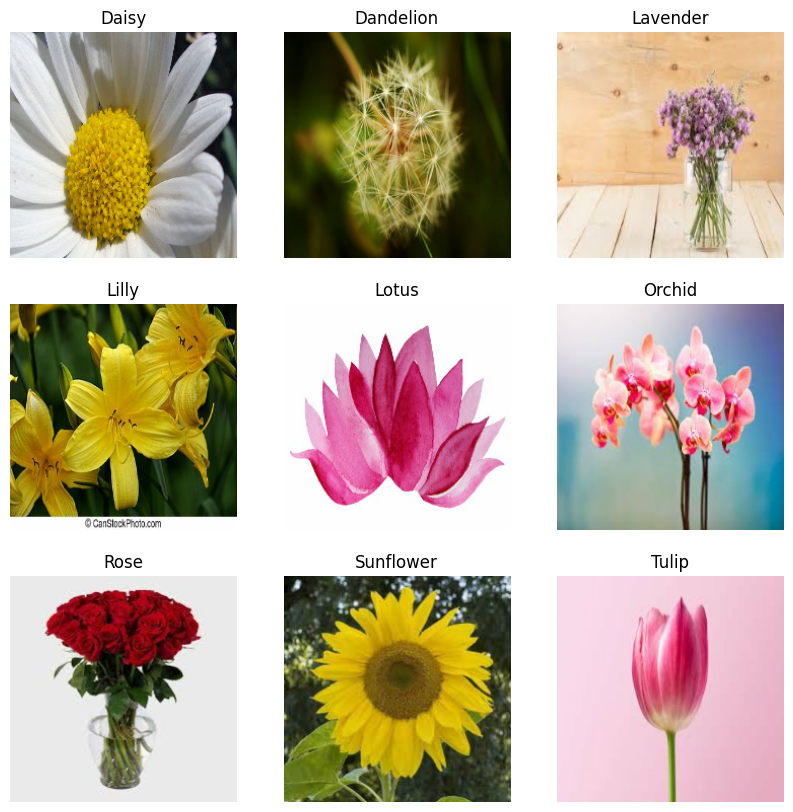

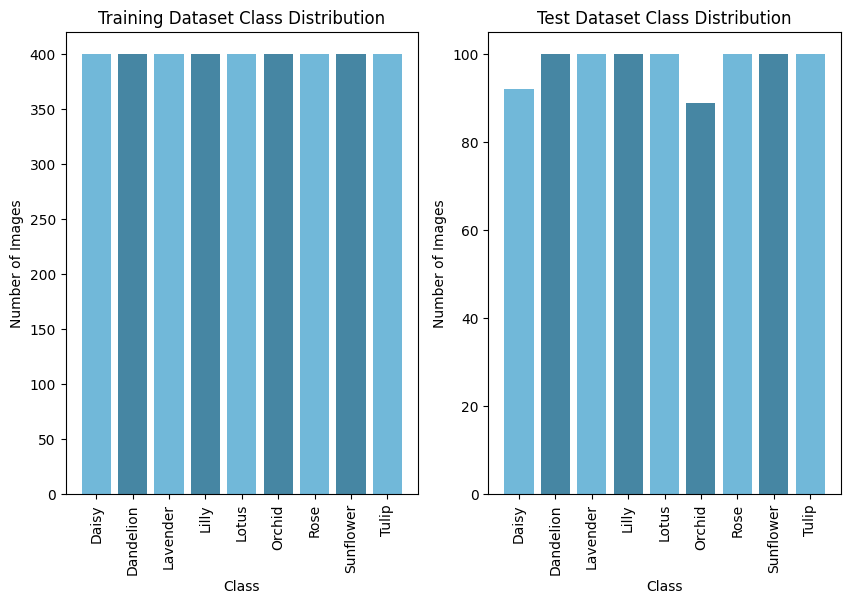

In [22]:
# Data visualisation

# Displaying sample images from the training dataset
images = []
for img_batch, label_batch in train_ds:
    images.extend(img_batch.numpy())

plt.figure(figsize=(10, 10))
for i in range(NB_CLASSES):
    ax = plt.subplot(3, 3, i + 1)
    ax.imshow(images[i * 400])
    ax.set_title(class_names[i])
    ax.set_axis_off()

plt.show()

# Visualising class distribution for the training dataset and the testing dataset
plt.figure(figsize=(10, 6))

class_distribution = []
for name in class_names:
    class_dir = os.path.join(train_dir, name)
    class_distribution.append(len(os.listdir(class_dir)))

ax = plt.subplot(1, 2, 1)
ax.bar(class_names, class_distribution, color=['#71b8d9', '#4686a3'])
ax.set_title('Training Dataset Class Distribution')
ax.set_xlabel('Class')
ax.set_ylabel('Number of Images')
ax.tick_params(axis='x', labelrotation=90)

class_distribution = []
for name in class_names:
    class_dir = os.path.join(test_dir, name)
    class_distribution.append(len(os.listdir(class_dir)))

ax = plt.subplot(1, 2, 2)
ax.bar(class_names, class_distribution, color=['#71b8d9', '#4686a3'])
ax.set_title('Test Dataset Class Distribution')
ax.set_xlabel('Class')
ax.set_ylabel('Number of Images')
ax.tick_params(axis='x', labelrotation=90)

### Data correlation and feature engineering
